In [5]:
!pip install numpy pandas matplotlib seaborn scikit-learn statsmodels lightgbm plotly



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\KAMALESH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [8]:
import statsmodels.api as sm

In [9]:
plt.style.use("classic")
sns.set_style("whitegrid")

In [10]:
dataset = pd.read_csv("BoomBikes.csv")

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [18]:
print(dataset.columns)


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [19]:
dataset.columns = dataset.columns.str.strip()




In [20]:
print(dataset['dteday'].dtype)


object


In [22]:
dataset['dteday'] = pd.to_datetime(dataset['dteday'], errors='coerce')


In [24]:
dataset['dteday'] = pd.to_datetime(dataset['dteday'], format='%Y-%m-%d')



In [25]:
dataset[~dataset['dteday'].astype(str).str.match(r'\d{4}-\d{2}-\d{2}', na=False)]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12,13,NaT,1,0,1,0,6,0,1,6.765000,7.54415,47.0417,20.167000,38,1368,1406
13,14,NaT,1,0,1,0,0,0,1,6.595670,9.42065,53.7826,8.478716,54,1367,1421
14,15,NaT,1,0,1,0,1,1,2,9.566653,12.40560,49.8750,10.583521,222,1026,1248
15,16,NaT,1,0,1,0,2,1,1,9.498347,11.71085,48.3750,12.625011,251,953,1204
16,17,NaT,1,0,1,1,3,0,2,7.209153,8.83855,53.7500,12.999139,117,883,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,NaT,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,NaT,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,NaT,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,NaT,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [26]:
dataset.columns = dataset.columns.str.strip()
dataset['dteday'] = pd.to_datetime(dataset['dteday'], errors='coerce')


In [27]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      288 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [28]:
dataset["dteday"] = pd.to_datetime(dataset["dteday"])


In [30]:
season_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
month_map = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}

dataset["season"] = dataset["season"].map(season_map)
dataset["mnth"] = dataset["mnth"].map(month_map)



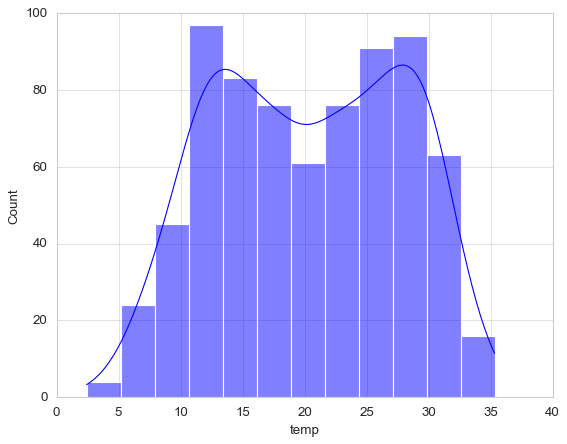

In [31]:
plt.figure()
sns.histplot(dataset["temp"], kde=True)
plt.show()

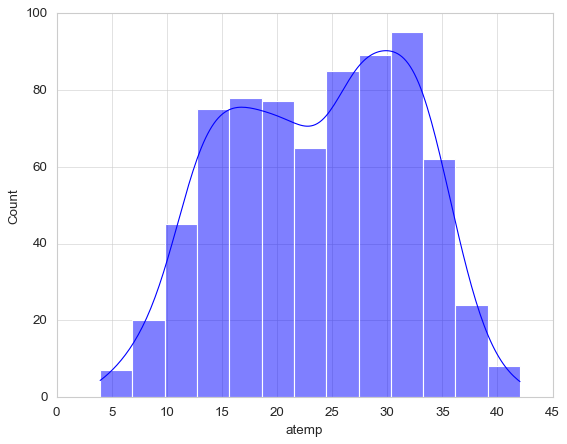

In [32]:
plt.figure()
sns.histplot(dataset["atemp"], kde=True)
plt.show()


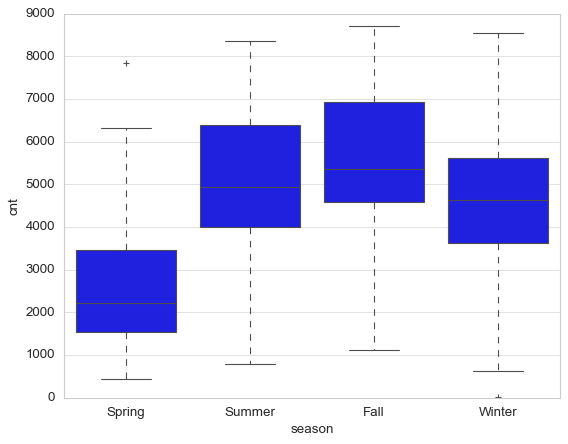

In [33]:
plt.figure()
sns.boxplot(x="season", y="cnt", data=dataset)
plt.show()

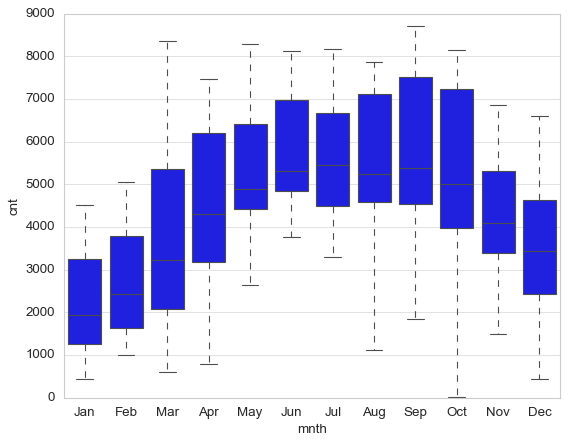

In [34]:
plt.figure()
sns.boxplot(x="mnth", y="cnt", data=dataset)
plt.show()


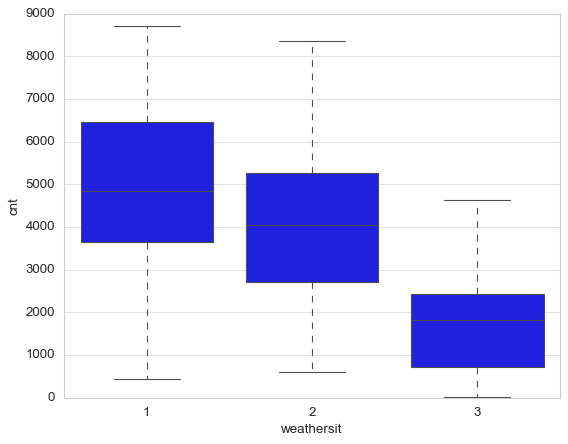

In [35]:
plt.figure()
sns.boxplot(x="weathersit", y="cnt", data=dataset)
plt.show()

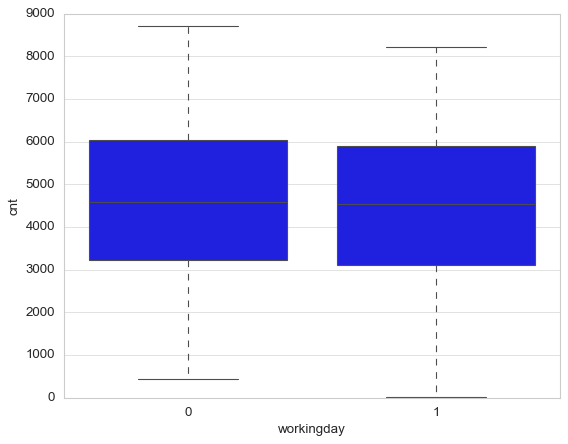

In [36]:
plt.figure()
sns.boxplot(x="workingday", y="cnt", data=dataset)
plt.show()

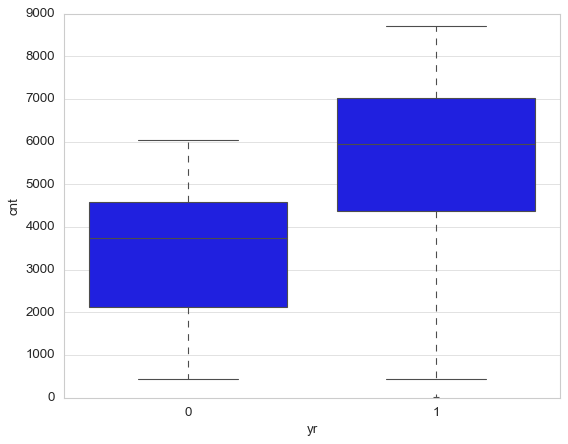

In [37]:
plt.figure()
sns.boxplot(x="yr", y="cnt", data=dataset)
plt.show()


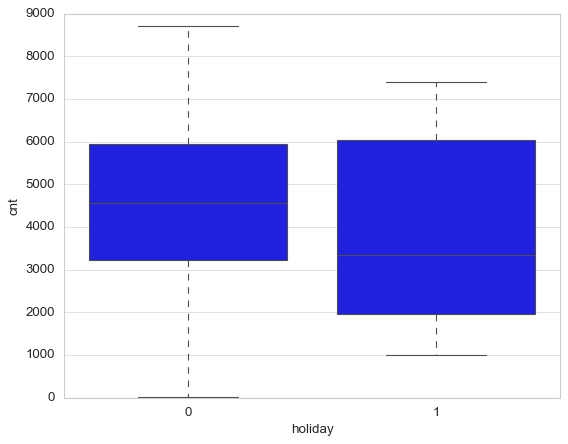

In [38]:
plt.figure()
sns.boxplot(x="holiday", y="cnt", data=dataset)
plt.show()

In [39]:
num_vars = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]
dataset_num = dataset[num_vars]

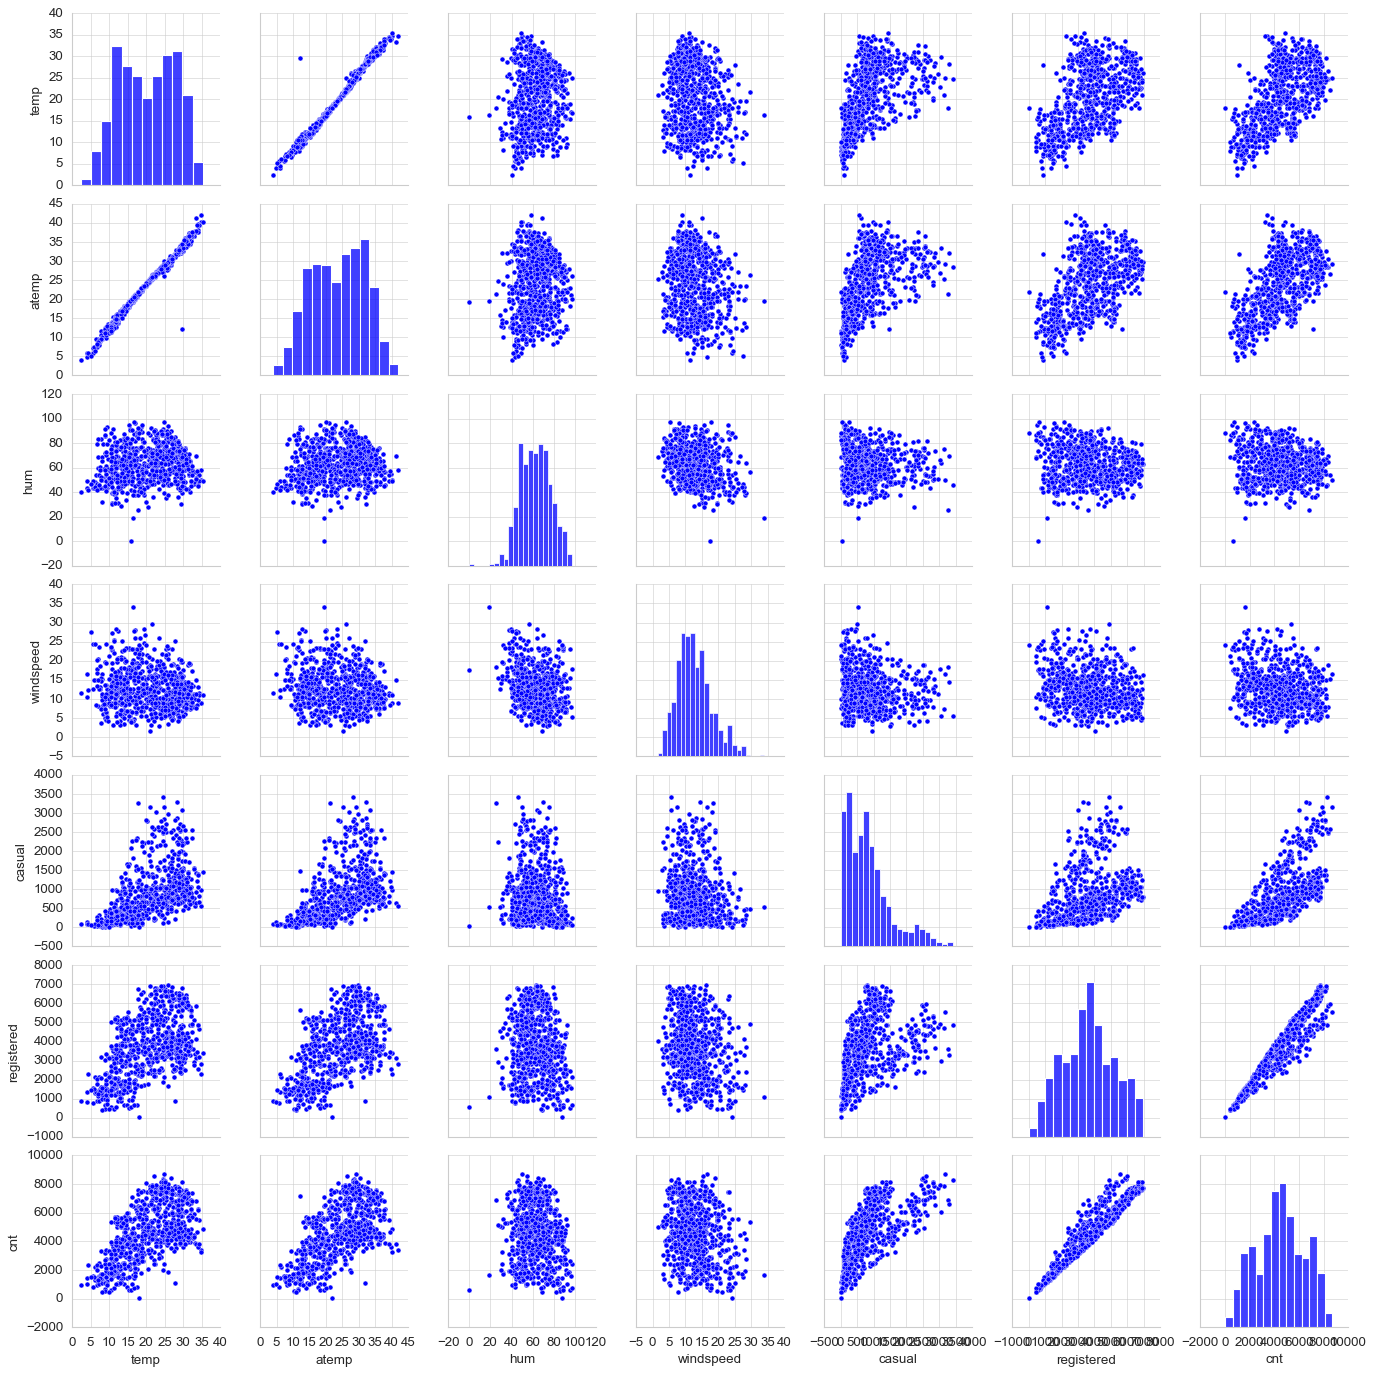

In [40]:
sns.pairplot(dataset_num)
plt.show()


In [41]:
dataset_num.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


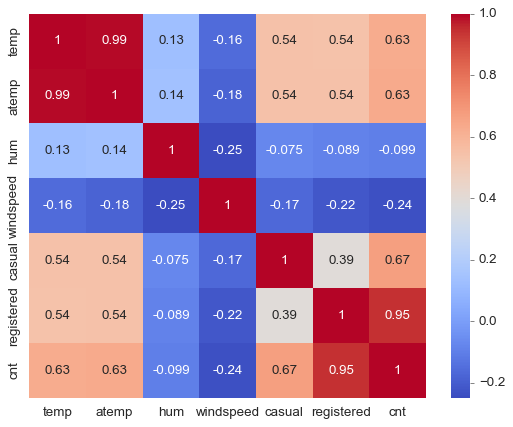

In [42]:
plt.figure()
sns.heatmap(dataset_num.corr(), annot=True, cmap="coolwarm")
plt.show()


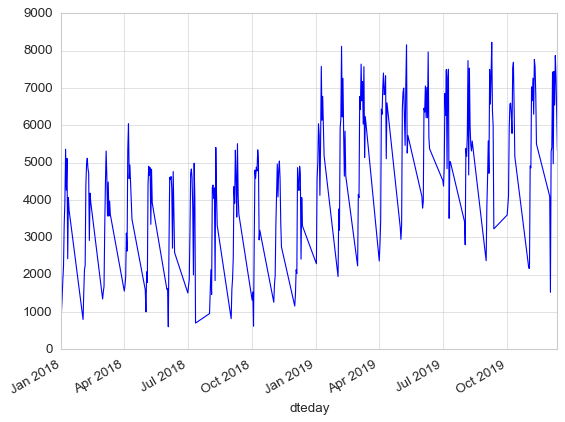

In [43]:
plt.figure()
dataset.groupby("dteday")["cnt"].sum().plot()
plt.show()

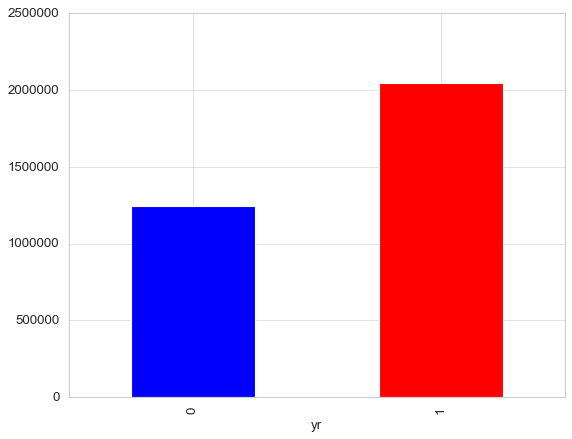

In [44]:
year_cnt = dataset.groupby("yr")["cnt"].sum()
plt.figure()
year_cnt.plot(kind="bar", color=["blue", "red"])
plt.show()


In [45]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.drop(["instant", "dteday"], axis=1, inplace=True)


In [46]:
X = dataset.drop("cnt", axis=1)
y = dataset["cnt"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
y_pred = lr.predict(X_test_scaled)

In [51]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 1.0
RMSE: 1.8810050733281043e-12


In [52]:
X_train_sm = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.408e+30
Date:                Sat, 17 Jan 2026   Prob (F-statistic):               0.00
Time:                        16:35:53   Log-Likelihood:                 12612.
No. Observations:                 511   AIC:                        -2.517e+04
Df Residuals:                     485   BIC:                        -2.506e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4552.9511    2.1e-13   2.17e+16      0.0

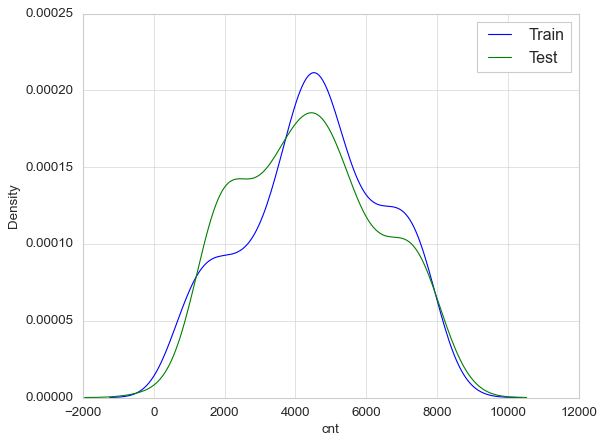

In [53]:
plt.figure()
sns.kdeplot(y_train, label="Train")
sns.kdeplot(y_test, label="Test")
plt.legend()
plt.show()

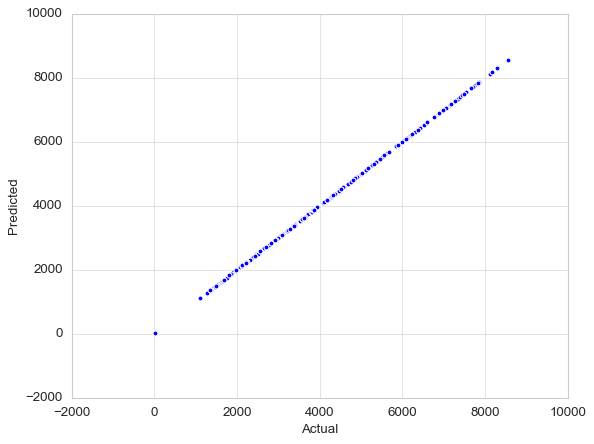

In [54]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [57]:
numeric_df = dataset.select_dtypes(include='number')


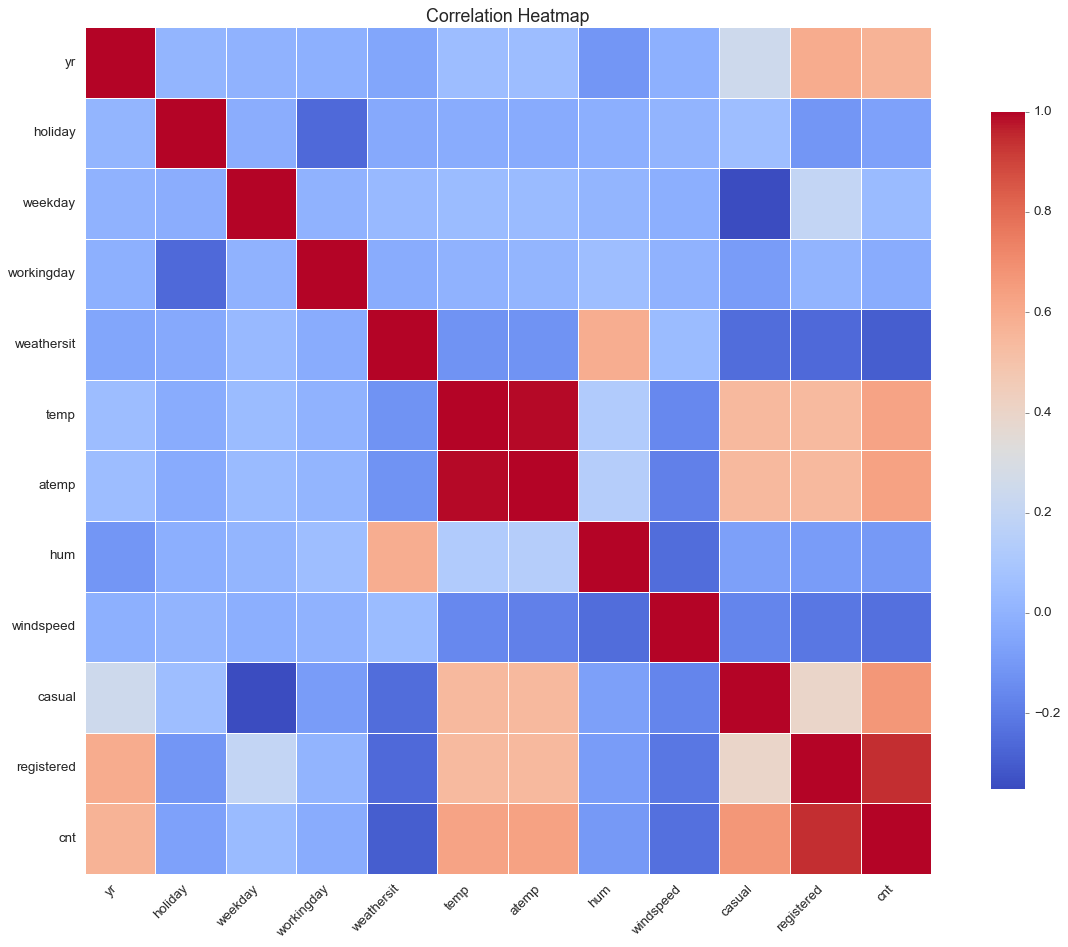

In [58]:
plt.figure(figsize=(16, 12))

sns.heatmap(
    numeric_df.corr(),
    cmap='coolwarm',
    annot=False,        # remove numbers (clean look)
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


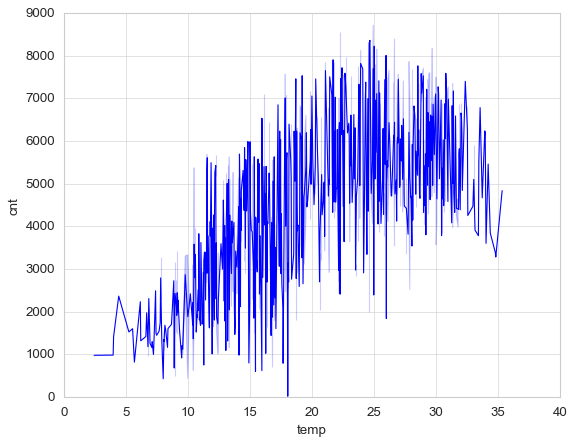

In [59]:
plt.figure()
sns.lineplot(x="temp", y="cnt", data=dataset)
plt.show()

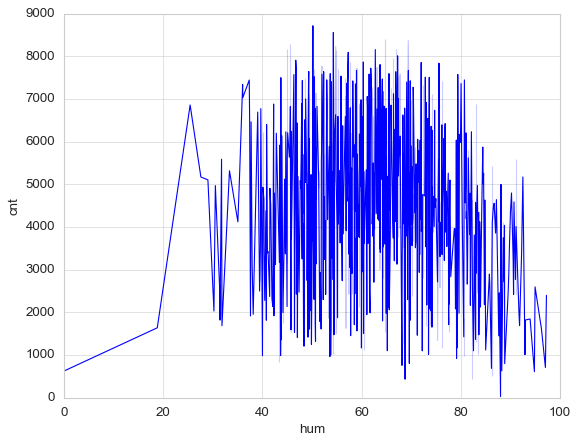

In [60]:

plt.figure()
sns.lineplot(x="hum", y="cnt", data=dataset)
plt.show()

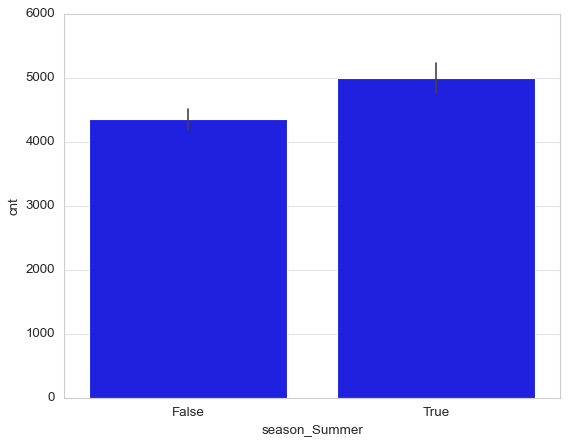

In [61]:
plt.figure()
sns.barplot(x="season_Summer", y="cnt", data=dataset)
plt.show()


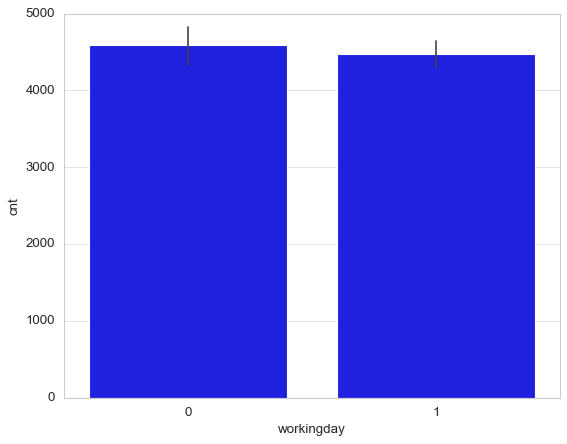

In [62]:
plt.figure()
sns.barplot(x="workingday", y="cnt", data=dataset)
plt.show()

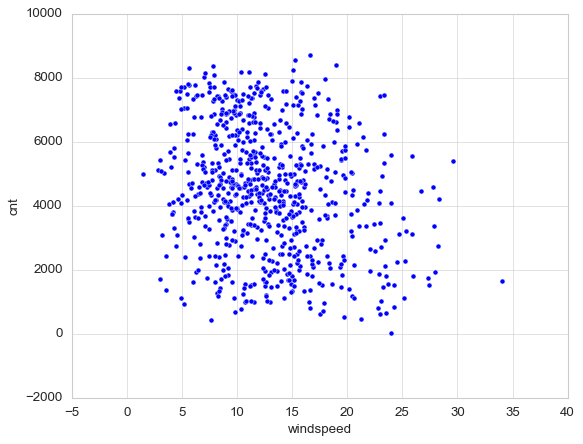

In [63]:
plt.figure()
sns.scatterplot(x="windspeed", y="cnt", data=dataset)
plt.show()


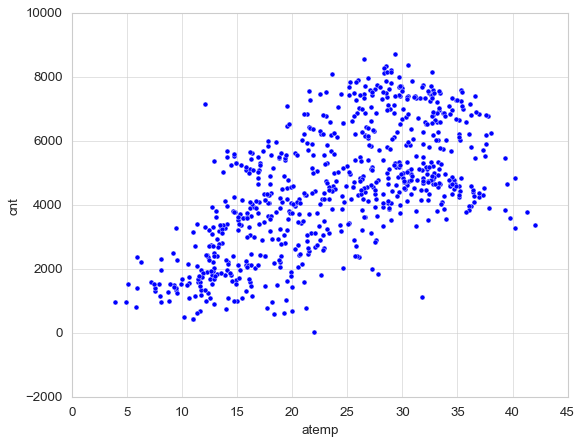

In [64]:
plt.figure()
sns.scatterplot(x="atemp", y="cnt", data=dataset)
plt.show()



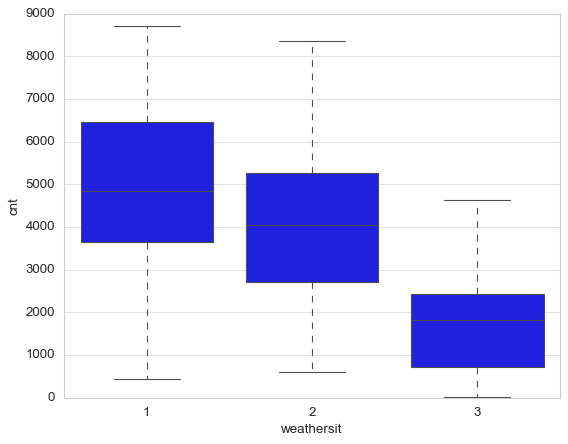

In [65]:
plt.figure()
sns.boxplot(x="weathersit", y="cnt", data=dataset)
plt.show()

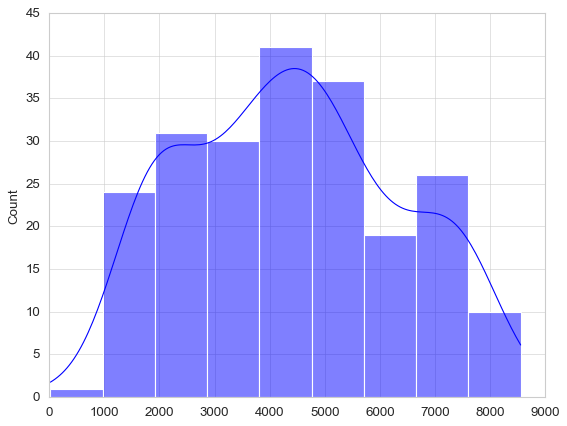

In [66]:
plt.figure()
sns.histplot(y_pred, kde=True)
plt.show()

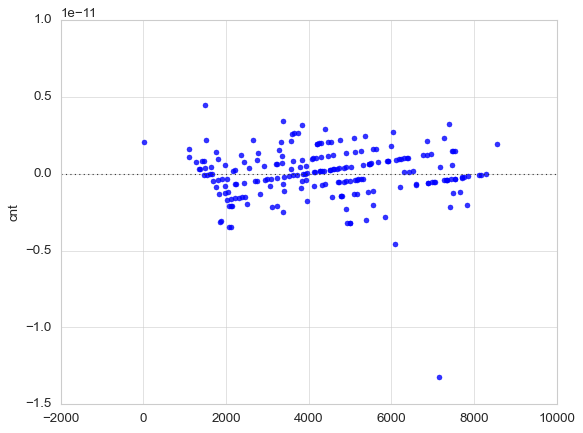

In [67]:
plt.figure()
sns.residplot(x=y_pred, y=y_test - y_pred)
plt.show()

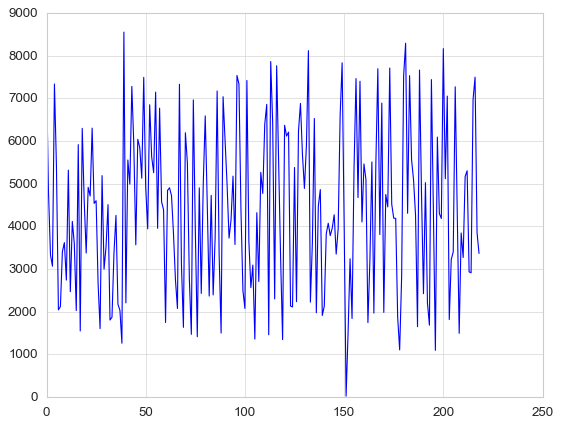

In [68]:
plt.figure()
sns.lineplot(x=range(len(y_pred)), y=y_pred)
plt.show()